In [21]:
%load_ext autoreload
%autoreload 2
import os
from SRtools import sr_mcmc as srmc
import argparse
from SRtools import config_lib as cl
from SRtools import deathTimesDataSet as dtds
import ast
from SRtools import readResults as rr
from SRtools import readResultsBaysian as rrb
import corner
import matplotlib.pyplot as plt
import matplotlib
from SRtools import SRmodellib as sr
from SRtools import SRmodellib_lifelines as srl
import emcee
import numpy as np
from SRtools import SR_hetro as srh
from SRtools import presets
import matplotlib.pyplot as plt
from SRtools import readResultsBaysian as rrb
from matplotlib import image as mpimg
from matplotlib import offsetbox
from SRtools import utils


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
index_offset = 0
name_suffix = "for_separate_figs"
save = True

In [23]:
config_excel_file_path = 'configurations_baysian.xlsx'


config_names_full = ['mice_F', 'mice_M', 'yeast', 'celegans', 'ecoli', 'cats_vp_M', 'cats_vp_F',
 'drosophila_853', 'drosophila_707', 'drosophila_441', 'drosophila_217',
  'Sweden_M_1910_hetro', 'Sweden_F_1910_homo', 'Sweden_F_1910_hetro', 'Denmark_M_1900_hetro', 'Denmark_M_1900_homo', 'Denmark_M_1890_hetro', 'Denmark_M_1890_homo', 'Denmark_F_1900_hetro', 'Denmark_F_1890_hetro',
   'Staffy_vetCompass', 'Labradors_vetCompass', 'Jack_Russell_vetCompass', 'German_Shepherd_vetCompass',
    ]#'Guiniea_pig_VC']

config_names_fig2 = ['mice_F', 'mice_M', 'yeast', 'celegans', 'ecoli', 'cats_vp_M', 'cats_vp_F',
 'drosophila_853', 'drosophila_707', 'drosophila_441', 'drosophila_217',
 'Denmark_M_1900_hetro', 'Denmark_F_1900_hetro',
   'Staffy_vetCompass', 'Labradors_vetCompass', 'Jack_Russell_vetCompass', 'German_Shepherd_vetCompass',
   'Guiniea_pig_VC'
  ]

In [24]:
data_sets_path = {}
dataSets = {}
time_ranges = {}
bestSims = {}


for config_name in config_names_fig2:
    config = cl.read_excel_config(config_excel_file_path, config_name)
    cfg = cl.config_to_dict(config, mcmc_convert=True)
    ds_path = data_file = cfg.get('data_file')

    # ensure ds_path includes 'datasets/' at the start
    if not ds_path.startswith('datasets/'):
        ds_path = 'datasets/' + ds_path.split('datasets/')[-1]
    
    data_sets_path[config_name] = ds_path
    dataSets[config_name] = dtds.dsFromFile(ds_path,properties=['death dt'])

    time_range = presets.get_config_params(config_name,['time_range'],[list])['time_range']
    time_ranges[config_name] = time_range

    # sim = presets.getSim(config_name,type='max_likelihood')
    # bestSims[config_name] = sim




Using alias 'celegans' -> 'celegans'
Using alias 'Staffy_vetCompass' -> 'Staffy_vetCompass'


In [25]:
thetas = {}

for config_name in config_names_full:
    theta = presets.getTheta(config_name)
    thetas[config_name] = theta

Converting time units: days -> weeks (s=7.0)
Converting time units: days -> weeks (s=7.0)
Converting time units: days -> generations (s=0.125)
Using alias 'celegans' -> 'celegans'
Converting time units: days -> hours (s=0.041666666666666664)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Using alias 'Staffy_vetCompass' -> 'Staffy_vetCompass'
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0)
Converting time units: days -> years (s=365.0

In [26]:
print(dataSets.keys())

dict_keys(['mice_F', 'mice_M', 'yeast', 'celegans', 'ecoli', 'cats_vp_M', 'cats_vp_F', 'drosophila_853', 'drosophila_707', 'drosophila_441', 'drosophila_217', 'Denmark_M_1900_hetro', 'Denmark_F_1900_hetro', 'Staffy_vetCompass', 'Labradors_vetCompass', 'Jack_Russell_vetCompass', 'German_Shepherd_vetCompass', 'Guiniea_pig_VC'])


In [30]:
time_ranges_fits={'ecoli':None,
           'yeast': None,
           'celegans': None,
           'drosophila_441': None,
           'drosophila_217': None,
           'drosophila_707': None,
           'drosophila_853': None,
           'mice_F': None,
           'mice_M': None,
           'cats_vp_M': [2,25],
           'cats_vp_F': [2,25],
           'Labradors_vetCompass': [2,18],
           'Staffy_vetCompass': [2,18],
           'Jack_Russell_vetCompass': [2,18],
           'German_Shepherd_vetCompass': [2,15],
           'Denmark_M_1900_hetro': [20,120],
           'Denmark_F_1900_hetro': [20,120],
           'Guiniea_pig_VC': None
}

Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval not available for this dataset.
Confidence interval not available for this dataset
Confidence interval no

,Key,Weibull BIC,Gompertz BIC,Difference,Better Model,Weibull Params,Gompertz Params
0,mice_F,33092.892869,47020.397857,13927.504988,Weibull,"{'lambda_': 134.9866607921613, 'rho_': 5.77236...","{'eta': 1.3650532373577437e-09, 'alfa': 0.1186..."
1,mice_M,26007.576247,43903.138631,17895.562384,Weibull,"{'lambda_': 117.75958454058627, 'rho_': 3.5186...","{'eta': 1.555339218321842e-09, 'alfa': 0.12262..."
2,yeast,179933.378415,182962.404935,3029.026520,Weibull,"{'lambda_': 29.581527211721983, 'rho_': 3.0001...","{'eta': 0.006083446982201812, 'alfa': 0.089668..."
3,celegans,9906.666965,10268.164010,361.497045,Weibull,"{'lambda_': 19.40788805722731, 'rho_': 7.26298...","{'eta': 0.00033503094324095615, 'alfa': 0.3546..."
4,ecoli,42485.701103,41819.053938,666.647166,gompertz,"{'lambda_': 71.70982124243385, 'rho_': 3.55365...","{'eta': 0.0010062737916602085, 'alfa': 0.05388..."
5,cats_vp_M,16841.037302,16679.112797,161.924505,gompertz,"{'lambda_': 13.808848770960903, 'rho_': 2.7547...","{'eta': 0.01138258813869408, 'alfa': 0.2028700..."
6,cats_vp_F,15759.874123,15430.357190,329.516933,gompertz,"{'lambda_': 15.062227157444283, 'rho_': 3.1772...","{'eta': 0.006351044997783894, 'alfa': 0.231105..."
7,drosophila_853,8141.123171,8085.960218,55.162953,gompertz,"{'lambda_': 48.839545067331315, 'rho_': 5.4460...","{'eta': 0.00031584892564114444, 'alfa': 0.1195..."
8,drosophila_707,6840.060594,7006.199878,166.139284,Weibull,"{'lambda_': 25.048352511939406, 'rho_': 3.3249...","{'eta': 0.0055094195867772065, 'alfa': 0.12064..."
9,drosophila_441,7849.552970,7920.896171,71.343201,Weibull,"{'lambda_': 53.0943629274807, 'rho_': 6.581466...","{'eta': 0.00016896600033981156, 'alfa': 0.1226..."


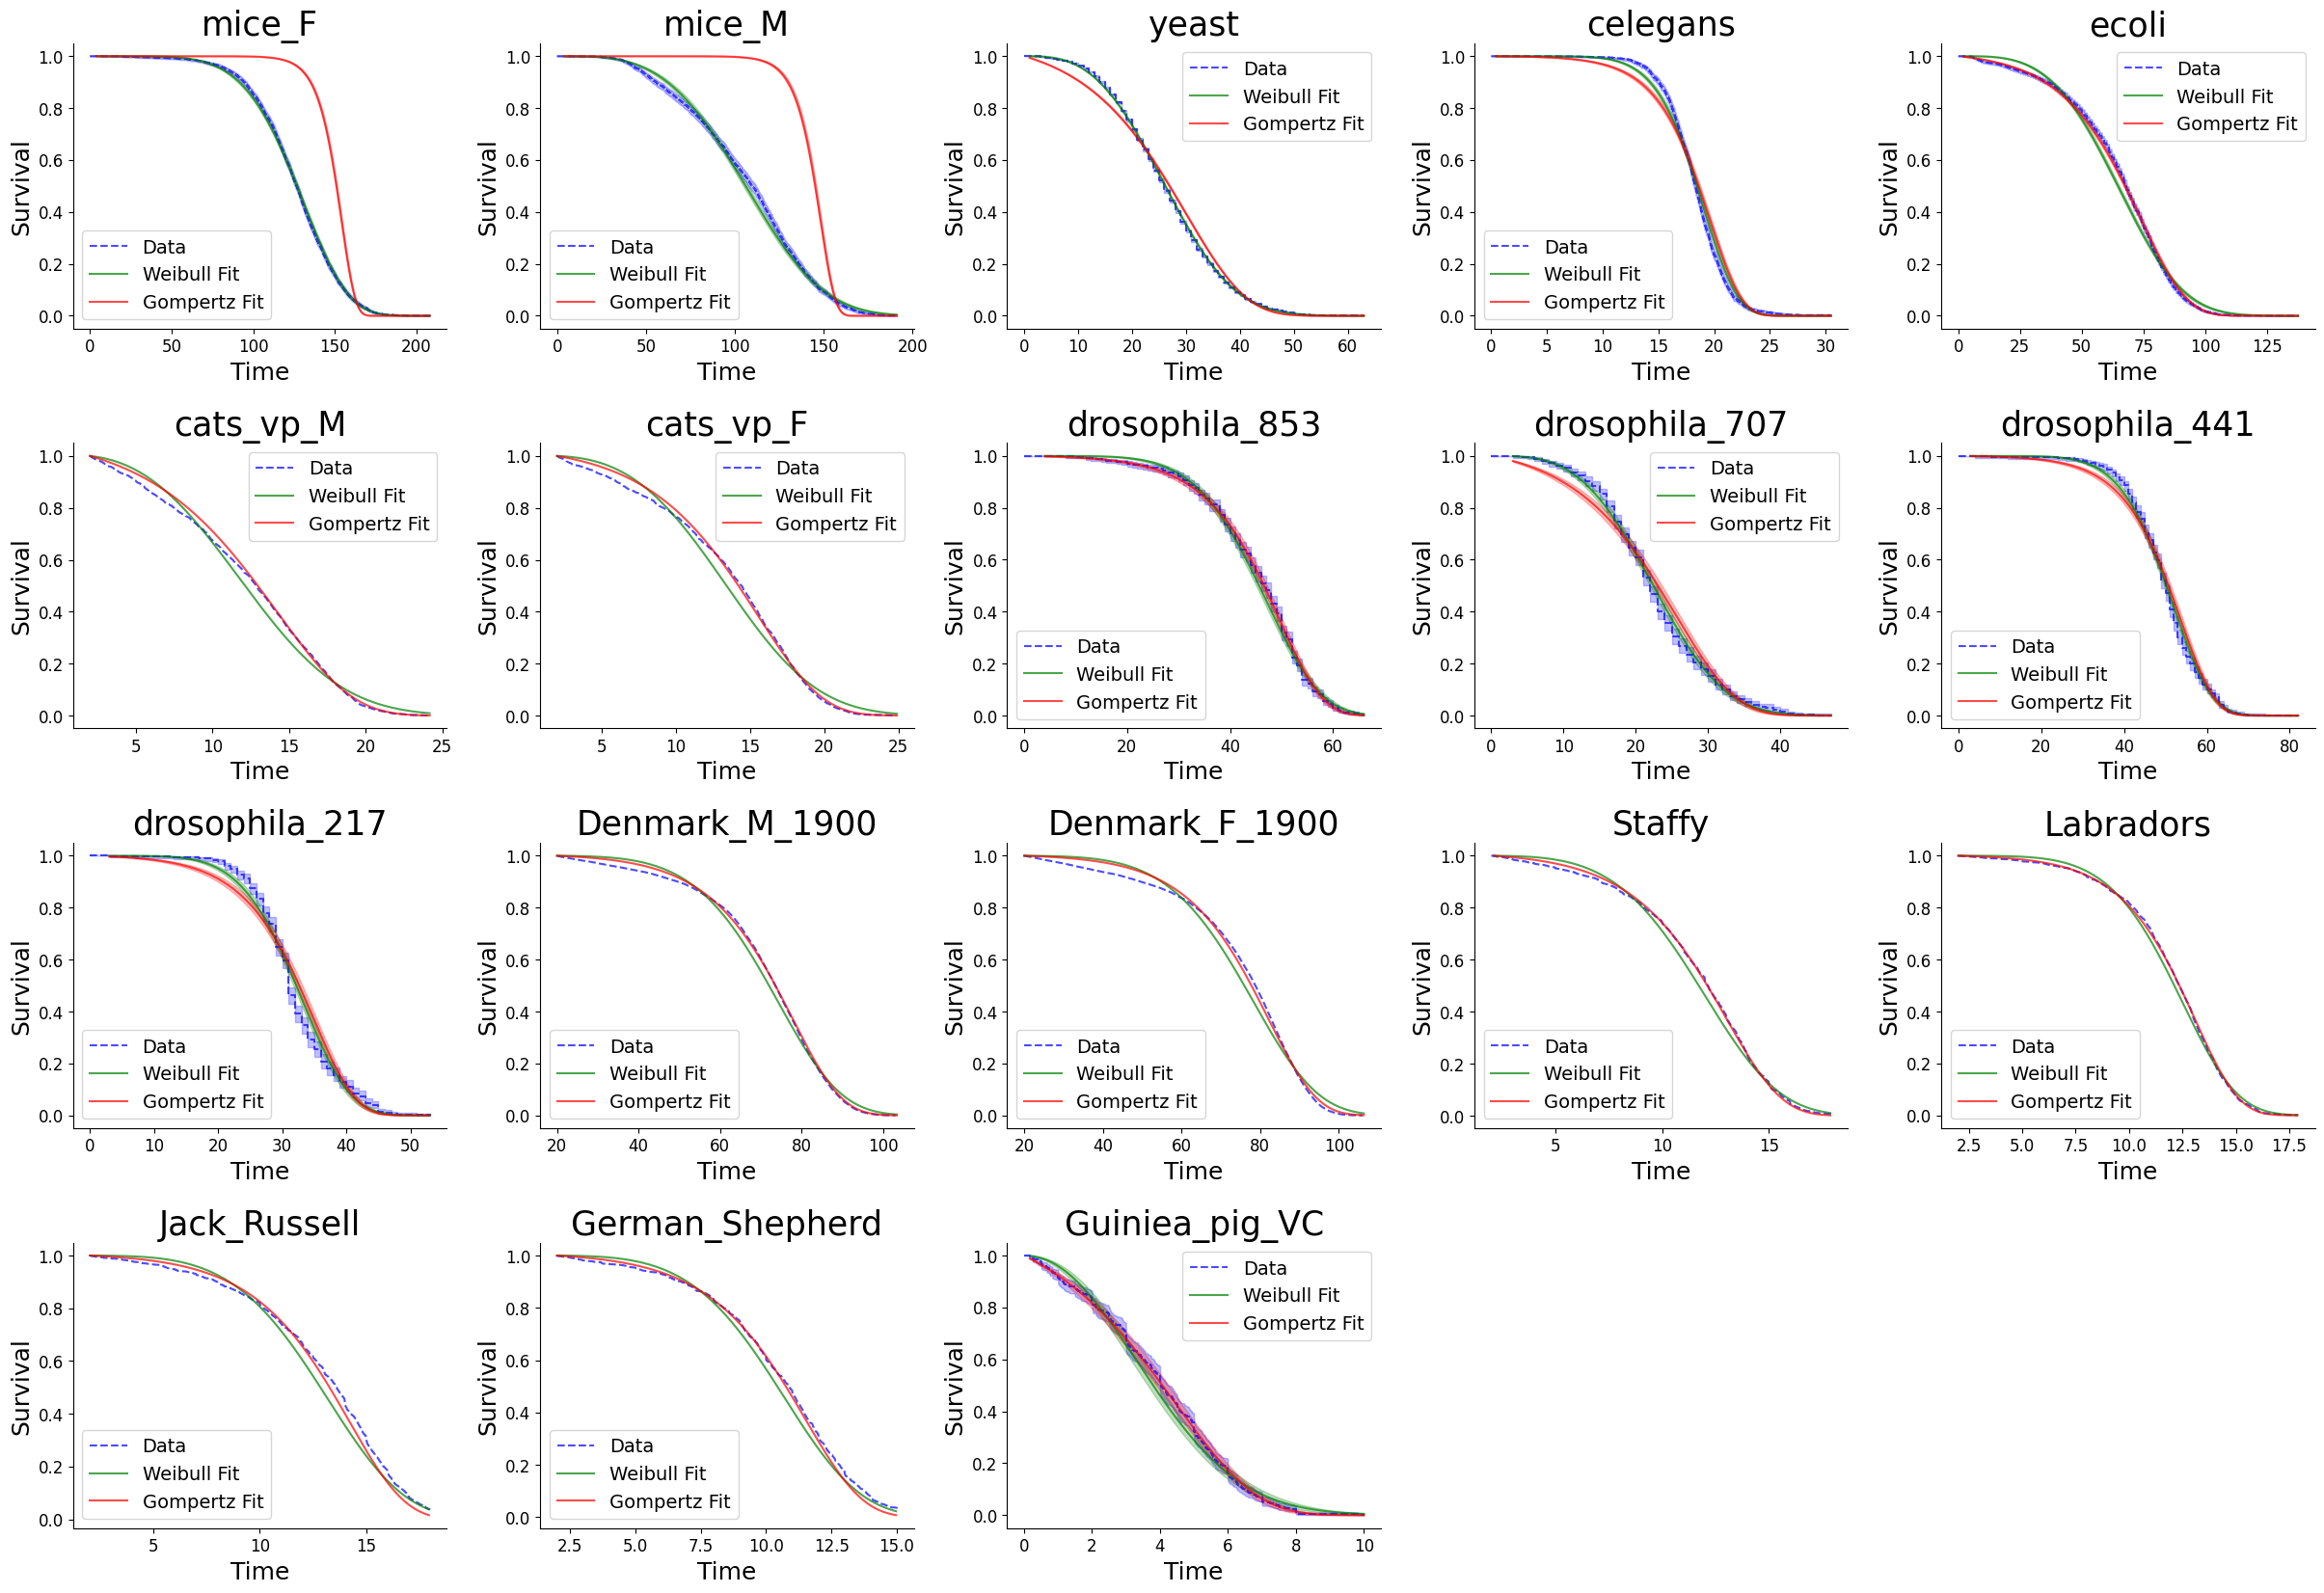

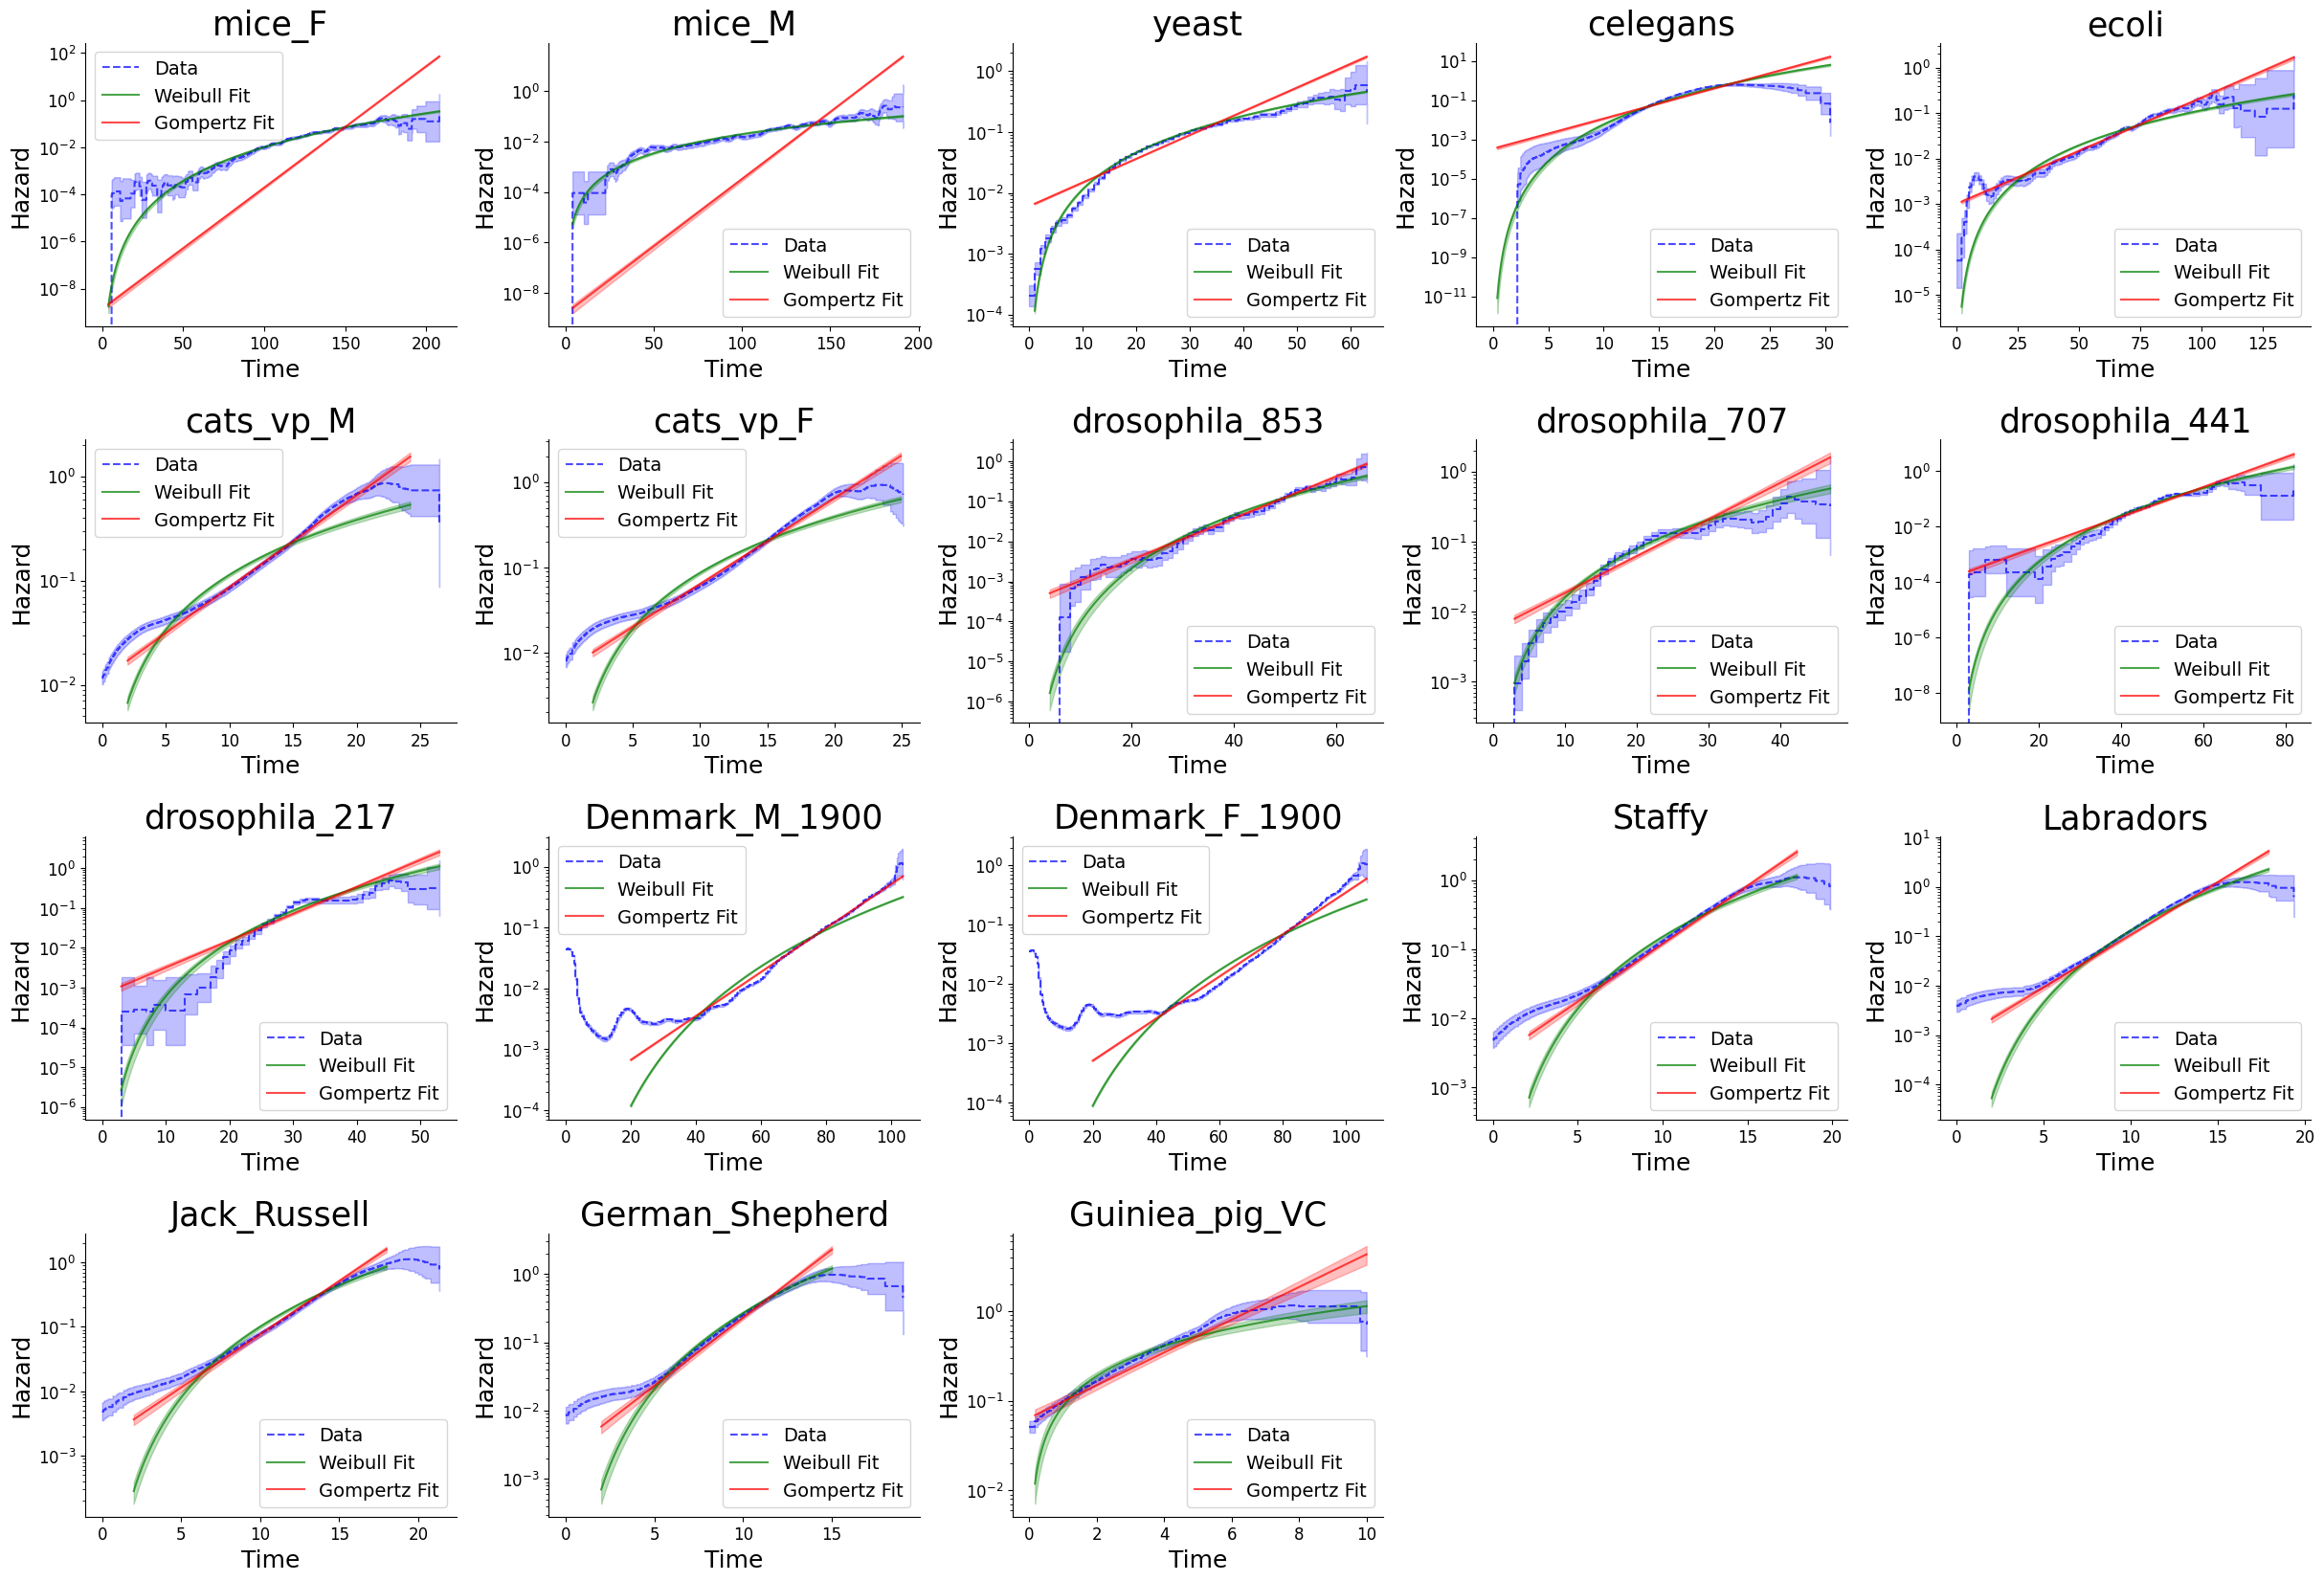

In [32]:
from SRtools import weibullFitter as wft
from SRtools import makhamGompertzFitter as mgf
import pandas as pd
import re

wfs  = {}
gmfs = {}
for key, value in dataSets.items():
    time_range = time_ranges_fits[key]
    # fit weibull and gompertz makeham to the data within the time range
    death_times = value.death_times.copy()
    events = value.events.copy()
    # remove all death times and events that are not in the time range
    if time_range is not None:
        time_range = np.array(time_range).copy()
        events = events[(death_times >= time_range[0]) & (death_times <= time_range[1])]
        death_times = death_times[(death_times >= time_range[0]) & (death_times <= time_range[1])]
    wfs[key] = wft.WeibullFitter(death_times, events)
    gmfs[key] = mgf.GompertzMakehamFitter(death_times, events)

title_font = {'size': '25'}
axis_font = {'size': '18'}
ticks_font = {'size': '16'}
legend_font = {'size': '14'}

def clean_title(key):
    return re.sub(r'(_vetCompass|_hetro)$', '', key)

# for each data set, plot the dataset and the fitted weibull and gompertz makeham distributions. that's len(dataSets) separate subplots
fig, axs = plt.subplots(4, 5, figsize=(30, 20))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4, wspace=0.25)
for i, (key, dataset) in enumerate(dataSets.items()):
    ax = axs[i]
    time_range = time_ranges_fits[key]
    dataset.plotSurvival(ax=ax, time_range=time_range, label='Data', ls='--', color='blue', alpha=0.7)
    wfs[key].plotSurvival(ax=ax, time_range=time_range, label='Weibull Fit', color='green', alpha=0.7)
    gmfs[key].plotSurvival(ax=ax, time_range=time_range, label='Gompertz Fit', color='red', alpha=0.7)
    ax.set_title(f'{clean_title(key)}', **title_font)
    ax.legend(prop=legend_font)
    ax.set_xlabel('Time', **axis_font)
    ax.set_ylabel('Survival', **axis_font)
    # set ticks font
    ax.tick_params(axis='both', which='major', labelsize=12)
# Hide any unused axes (there are two unused axes in a 4x5 grid with 18 items)
if len(axs) > len(dataSets):
    for extra_ax in axs[len(dataSets):]:
        extra_ax.set_visible(False)
if save:
    plt.savefig('plots/survival_fits_WG.pdf', dpi=300, bbox_inches='tight', transparent=True)

# for each data set, plot the dataset and the fitted weibull and gompertz makeham distributions. that's len(dataSets) separate subplots
fig, axs = plt.subplots(4, 5, figsize=(30, 20))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4, wspace=0.25)
for i, (key, dataset) in enumerate(dataSets.items()):
    ax = axs[i]
    dataset.plotHazard(ax=ax, label='Data', ls='--', color='blue', alpha=0.7)
    wfs[key].plotHazard(ax=ax, label='Weibull Fit', color='green', alpha=0.7)
    gmfs[key].plotHazard(ax=ax, label='Gompertz Fit', color='red', alpha=0.7)
    ax.set_title(f'{clean_title(key)}', **title_font)
    ax.legend(prop=legend_font)
    ax.set_xlabel('Time', **axis_font)
    ax.set_ylabel('Hazard', **axis_font)
    ax.set_yscale('log')
    # set ticks font
    ax.tick_params(axis='both', which='major', labelsize=12)
# Hide any unused axes (there are two unused axes in a 4x5 grid with 18 items)
if len(axs) > len(dataSets):
    for extra_ax in axs[len(dataSets):]:
        extra_ax.set_visible(False)
if save:
    plt.savefig('plots/supplementary_hazard_fits_WG.pdf', dpi=300, bbox_inches='tight', transparent=True)

# print table of the key, and the bic value for the weibull and gompertz makeham fits, so the column names are 'Key', 'Weibull BIC', 'Gompertz-Makeham BIC'
# to access the bic use the BIC() method of the fitter
# Create a list to store the table data
table_data = []

# Populate the table data with keys, BIC values, and the better model
for key in dataSets.keys():
    weibull_bic = wfs[key].BIC()
    weibull_params = wfs[key].getParams()
    
    gompertz_bic = gmfs[key].BIC()
    gompertz_params = gmfs[key].getParams()
    
    difference = np.abs(weibull_bic - gompertz_bic)
    better_model = "gompertz" if gompertz_bic < weibull_bic else "Weibull"
    table_data.append({
        'Key': clean_title(key),
        'Weibull BIC': weibull_bic,
        'Gompertz BIC': gompertz_bic,
        'Difference': difference,
        'Better Model': better_model,
        'Weibull Params': weibull_params.to_dict(),
        'Gompertz Params': gompertz_params.to_dict()
    })

# Convert the table data to a pandas DataFrame and print it
bic_table = pd.DataFrame(table_data)
display(bic_table)
if save:
    bic_table.to_csv('bic_comparison_results.csv', index=False)
